In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from os import path
import array
import matplotlib.colors as mcolors
import cmasher as cmr
import sys

sys.path.append(path.abspath("/home/bego/GARROTXA/"))

import GalaDyn
#from config import *
from GalaDyn.snapshot_definition import *
#from GalaDyn.snapshot_definition import cartesian_to_cylindrical
#from GalaDyn.config import *

path_csv = "/mnt/usb-TOSHIBA_EXTERNAL_USB_20220124010088F-0:0-part2/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration_v2/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)


In [7]:
name = 600
snapshot = Snapshot(name)

Initializing snapshot 600
Lookback time: 6.323181769898123 Gyr


In [63]:
def add_bar ( fig, i, aplot, label):
    cbar_ax = fig.add_axes([ 0.2*i + 0.002, 0.97,0.18, 0.025])
    cbar = fig.colorbar(aplot, cax=cbar_ax,orientation='horizontal')          
    cbar.ax.tick_params(labelsize= 10,top= True,bottom= False,
                        labeltop=True,  labelbottom= False)
    cbar.set_label(label=f"{label}", size = 10)
    cbar.ax.tick_params(labelsize= 10)

In [64]:
limit_AB = 25
nn = 0.4
rangex=[-limit_AB,limit_AB]
rangey=[-limit_AB,limit_AB]
binsx=100
binsy=100

aspect=(rangex[1]-rangex[0])/(rangey[1]-rangey[0])
deltax=(rangex[1]-rangex[0])/binsx
deltay=(rangey[1]-rangey[0])/binsy

Initializing snapshot 999
Lookback time: 0.0132086769907413 Gyr


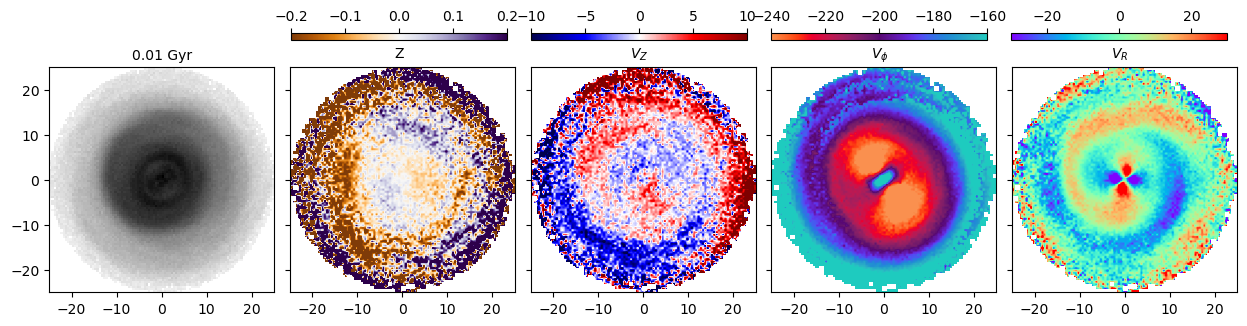

In [65]:
snapshot.load_stars()
snapshot.load_disk()
dfA = snapshot.filter_disk_particles()
df = dfA[(dfA["Z"]< 2.5)&(dfA["Z"]> -2.5)]
fig, ax = plt.subplots(1,5,figsize = (12,3),sharex = True,sharey = True)

ax[0].hist2d(df["X"], df["Y"],bins = [binsx,binsy], 
               norm=mcolors.PowerNorm(nn), range = [rangex, rangey],
               cmap="gist_yarg") 
ax[0].set_box_aspect(1)
#  ax[j, i].set_title("%.2f Gyr. Age %.2f - %.2f Gyr" %(lookback,edad_a/1000, edad_b/1000 ), fontsize = 8)
ax[0].set_title("%.2f Gyr" %(snapshot.lb), fontsize = 10)

stat0=stats.binned_statistic_2d(df["X"], df["Y"], df['Z'], 
                                statistic='mean', bins=(binsx,binsy), 
                                range=[rangex,rangey])
im=np.flip(stat0.statistic.T*1.,0)
z = ax[1].imshow(im,cmap='PuOr', extent=[rangex[0],rangex[1],rangey[0],rangey[1]]
       ,aspect=aspect,vmin=-0.2,vmax=0.2)
#Vz plot
stat0=stats.binned_statistic_2d(df["X"], df["Y"], df['VZ'], statistic='mean', bins=(binsx,binsy), range=[rangex,rangey])
im_vz=np.flip(stat0.statistic.T*1.,0)
vz =  ax[2].imshow(im_vz,cmap='seismic', extent=[rangex[0],rangex[1],rangey[0],rangey[1]]
       ,aspect=aspect,vmin=-10,vmax=10)
#Vphi plot
stat0=stats.binned_statistic_2d(df["X"], df["Y"], df['Vphi'], statistic='median', bins=(binsx,binsy), range=[rangex,rangey])
im_vphi=np.flip(stat0.statistic.T*1.,0)
vphi = ax[3].imshow(im_vphi,cmap='cmr.guppy', extent=[rangex[0],rangex[1],rangey[0],rangey[1]]
        ,aspect=aspect,vmin=-240,vmax=-160)

#Vr plot
stat0=stats.binned_statistic_2d(df["X"], df["Y"], df['VR'], statistic='mean', bins=(binsx,binsy), range=[rangex,rangey])
im_vr=np.flip(stat0.statistic.T*1.,0)
vr = ax[4].imshow(im_vr,cmap='rainbow', extent=[rangex[0],rangex[1],rangey[0],rangey[1]]
        ,aspect=aspect,vmin=-30,vmax=30)

add_bar (fig, 1, z, "Z")
add_bar (fig, 2, vz, "$V_{Z}$")
add_bar (fig, 3, vphi, "$V_{\phi}$")
add_bar (fig, 4, vr, "$V_{R}$")

plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.99, top=0.89, wspace=0.07, hspace= 0.09)
plt.show()

In [ ]:
snapshot.calculate_bending_breathing() 
data = snapshot.bending_breathing_mode

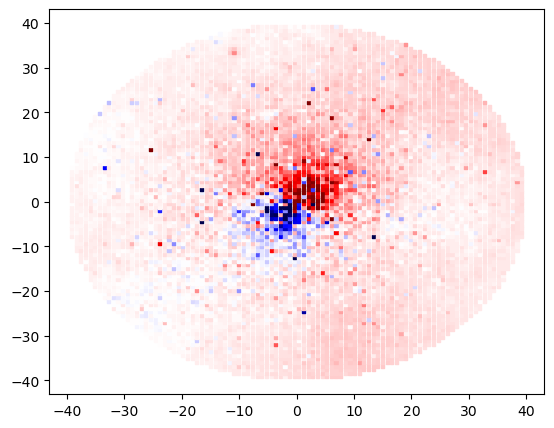

In [9]:
az_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_dm_612_ytRS_40_with_sat.csv", sep = ",")
rango_z=1e-14*seconds_to_Myr 
size = 5
ancho = 40

theta = np.linspace(0, 2*np.pi, 100)
r1 = 25
x = r1*np.cos(theta)
y = r1*np.sin(theta)

fig, ax = plt.subplots(1, 1,figsize = (5,5))
dm = ax.scatter(az_dm.X,az_dm.Y, marker='s', c=az_dm.az*seconds_to_Myr , 
            cmap= "seismic", s = size, vmin =-rango_z, vmax = rango_z)


plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.99, top=0.89, wspace=0.2, hspace= 0.09)

plt.show()


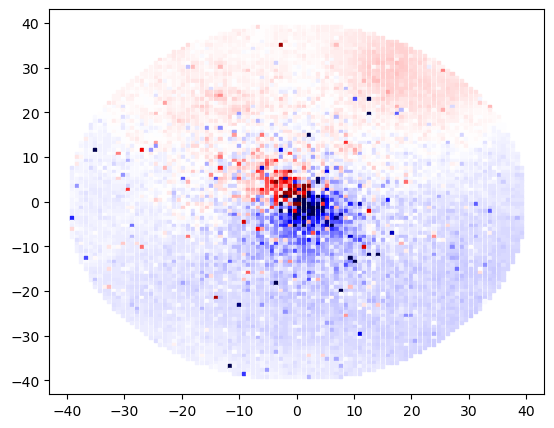

In [7]:
az_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_dm_600_ytRS_40_with_sat.csv", sep = ",")
rango_z=1e-14*seconds_to_Myr 
size = 5
ancho = 40

theta = np.linspace(0, 2*np.pi, 100)
r1 = 25
x = r1*np.cos(theta)
y = r1*np.sin(theta)

fig, ax = plt.subplots(1, 1,figsize = (5,5))
dm = ax.scatter(az_dm.X,-az_dm.Y, marker='s', c=-az_dm.az*seconds_to_Myr , 
            cmap= "seismic", s = size, vmin =-rango_z, vmax = rango_z)


plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.99, top=0.89, wspace=0.2, hspace= 0.09)

plt.show()

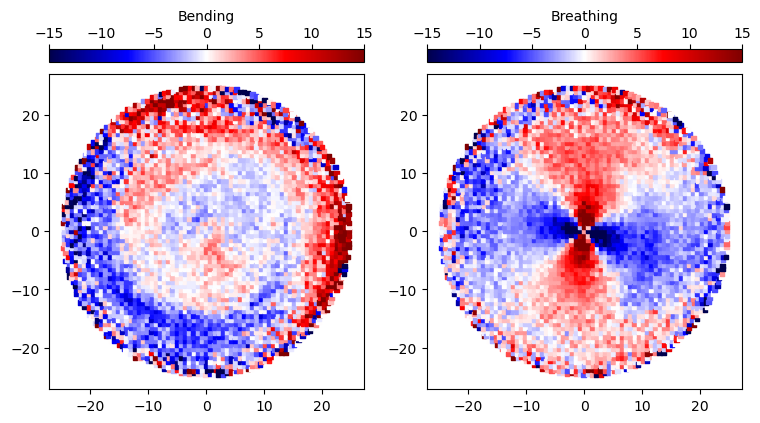

In [33]:
fig, ax = plt.subplots(1,2,figsize = (7,5))


bplot = ax[0].scatter(data.X, data.Y,c = data.Bending, 
                      cmap = "seismic", vmin = -15, vmax = 15, s = 10, marker= "s")
#ax[0].set_box_aspect(1)
aplot = ax[1].scatter(data.X,data.Y,c = data.Breathing, cmap = "seismic", vmin = -15, vmax = 15, s = 10, marker = "s")

#ax[1].set_box_aspect(1)
fig.colorbar(bplot, ax=ax[0], label =  "Bending",aspect=25,pad = 0.03, location = "top")
fig.colorbar(aplot, ax=ax[1], label =  "Breathing",aspect=25,pad = 0.03, location = "top")

plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.99, top=0.89, wspace=0.2, hspace= 0.09)

In [9]:
snapshot.load_accelerations() 

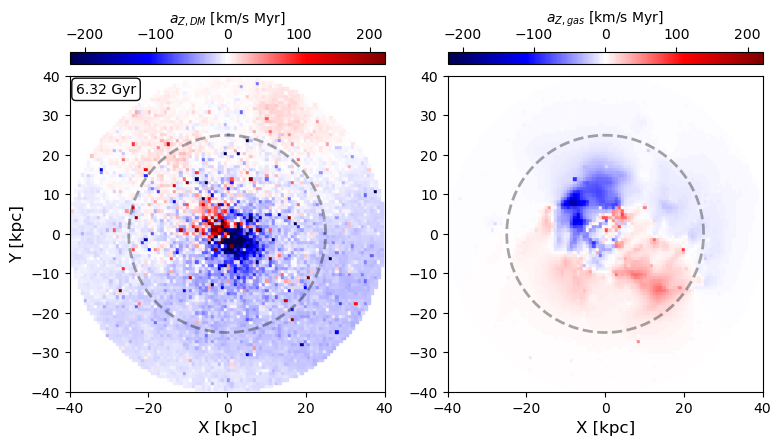

In [16]:
props = dict(boxstyle='round', facecolor='white', alpha=0.95)

rango_z=7e-15*seconds_to_Myr 
size = 5
ancho = 40

theta = np.linspace(0, 2*np.pi, 100)
r1 = 25
x = r1*np.cos(theta)
y = r1*np.sin(theta)

fig, ax = plt.subplots(1, 2,figsize = (7,5))
dm = ax[0].scatter(snapshot.az_dm.X,snapshot.az_dm.Y, marker='s', c=snapshot.az_dm.az*seconds_to_Myr , 
            cmap= "seismic", s = size, vmin =-rango_z, vmax = rango_z)

lb = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
#ax[0].set_title(f"{lb:.2f} Gyr", fontsize = 18)

gas = ax[1].scatter(snapshot.az_gas.X,snapshot.az_gas.Y, marker='s', c=snapshot.az_gas.az*seconds_to_Myr, 
            cmap= "seismic", s = size, vmin =-rango_z, vmax = rango_z)

for k in range(2):
    ax[k].set_xlabel("X [kpc]", fontsize = 12)
  #  ax[k].set_ylabel("Y [kpc]")
    ax[k].set_xlim(-ancho,ancho)
    ax[k].set_ylim(-ancho,ancho)
ax[0].set_ylabel("Y [kpc]", fontsize = 12)

for i in range(0,2):
    ax[i].plot(x, y, "--", color = "black", alpha = 0.35, lw = 2)
    
ax[0].tick_params(axis='both', which='major', labelsize=10)
ax[1].tick_params(axis='both', which='major', labelsize=10)

#ax[0].set_title(f"{snapshot.lb:.2f} Gyr")
ax[0].text(0.02, 0.98,f"{snapshot.lb:.2f} Gyr", transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
fig.colorbar(dm, ax=ax[0], label =  "$a_{Z, DM}$ [km/s Myr]",aspect=25,pad = 0.03, location = "top")
fig.colorbar(gas, ax=ax[1], label =  "$a_{Z, gas}$ [km/s Myr] ",aspect=25,pad = 0.03, location = "top")
plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.99, top=0.89, wspace=0.2, hspace= 0.09)

plt.show()
